In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

# Task 1 / 2
## Setting up Dataframe
combining vacation days data with country data such as population, year, real GDPE (rgdpe), and average hours worked (avh).
Also removing NaN values.

In [2]:
df_vac = pd.read_csv('../data/raw/days-of-vacation-and-holidays.csv') #Vacation days data
df_pwt = pd.read_csv('../data/raw/pwt100.csv',encoding='cp1251') #Penn-world table data

In [3]:
df_pwt.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rnna', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp', 'statcap',
       'csh_c', 'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i',
       'pl_g', 'pl_x', 'pl_m', 'pl_n', 'pl_k'],
      dtype='object')

I only really need the country, year, population, rgdpe, and avh. So I will extract those and then combine that result with the vacation data.

In [4]:
df_data = df_pwt[['country', 'year', 'pop', 'rgdpe', 'avh',]]
df_data = df_data.dropna()
df_vac = df_vac.rename(columns = {'Year': 'year', 'Entity': 'country'})
#Taking only the countries im interested in
df_data = df_data[df_data['country'].isin(['Australia', 'Belgium', 'Canada', 'Denmark', 'France', 'Germany', 'Ireland', 'Italy', 'Netherlands', 'Spain'
                                          'Sweden', 'Switzerland', 'United Kingdom', 'United States'])]

In [5]:
df = pd.merge(df_data, df_vac, how='left', on = ['country', 'year'])
df = df.fillna(method='ffill')
df = df.dropna()

In [6]:
df_vac.shape

(97, 4)

---
## Great, my data is all ready to work with now. 
---

In [7]:
df.rename(columns={ 'Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007)': 'vacation days'}, inplace=True)

In [8]:
df

,country,year,pop,rgdpe,avh,Code,vacation days
0,Australia,1950,8.354106,1.221764e+05,2170.923406,AUS,22.0
1,Australia,1951,8.599923,1.140998e+05,2150.846928,AUS,22.0
2,Australia,1952,8.782430,1.113938e+05,2130.956115,AUS,22.0
3,Australia,1953,8.950892,1.235207e+05,2111.249251,AUS,22.0
4,Australia,1954,9.159148,1.316807e+05,2091.724634,AUS,22.0
...,...,...,...,...,...,...,...
834,United States,2015,320.878310,1.890512e+07,1770.023174,USA,20.0
835,United States,2016,323.015995,1.928525e+07,1766.744125,USA,20.0
836,United States,2017,325.084756,1.975475e+07,1763.726676,USA,20.0
837,United States,2018,327.096265,2.036944e+07,1774.703811,USA,20.0


Gonna start by making a metric for productivity. First I will need gdp per capita, then I can calculate productivity by dividing gdp per capita by the average hours worked on average.

In [9]:
df['gdp per capita'] = df['rgdpe']/df['pop']
df['productivity'] = df['gdp per capita']/df['avh']

In [10]:
df = df[['country', 'year', 'pop', 'avh', 'rgdpe', 'gdp per capita', 'vacation days', 'productivity']]
df.head()
#Looks good!

,country,year,pop,avh,rgdpe,gdp per capita,vacation days,productivity
0,Australia,1950,8.354106,2170.923406,122176.4219,14624.715005,22.0,6.736633
1,Australia,1951,8.599923,2150.846928,114099.8125,13267.539508,22.0,6.168519
2,Australia,1952,8.782430,2130.956115,111393.7578,12683.706056,22.0,5.952120
3,Australia,1953,8.950892,2111.249251,123520.6563,13799.814882,22.0,6.536327
4,Australia,1954,9.159148,2091.724634,131680.6875,14376.957940,22.0,6.873256


### Now I'll start with some analysis. Where Task 1 Really starts:

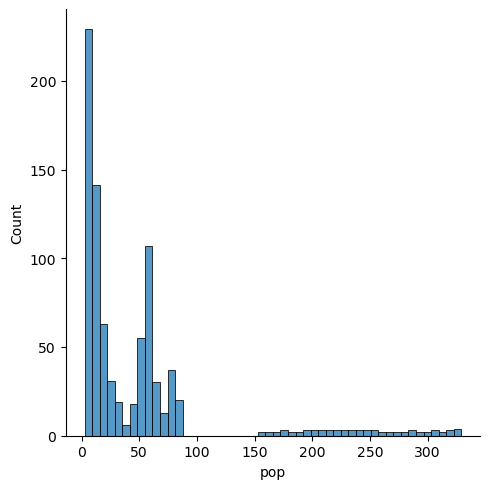

In [11]:
#Most of our data is looking at countries/years with populations of less than 100million, 
#while a few exceptions are in the >100 million population range
sns.displot(df['pop'], bins = 50)

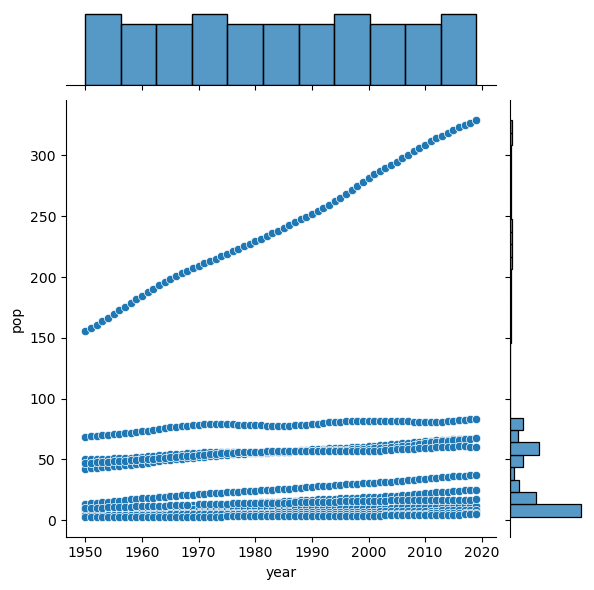

In [12]:
sns.jointplot(x='year', y='pop', data = df)
#One single country, the US, dominating in terms of population for our data. 
#For that reason, I created a separate dataset without the US.

The issue with the US will likely be annoying when trying to interpret data. So I will make another dataset without the US.

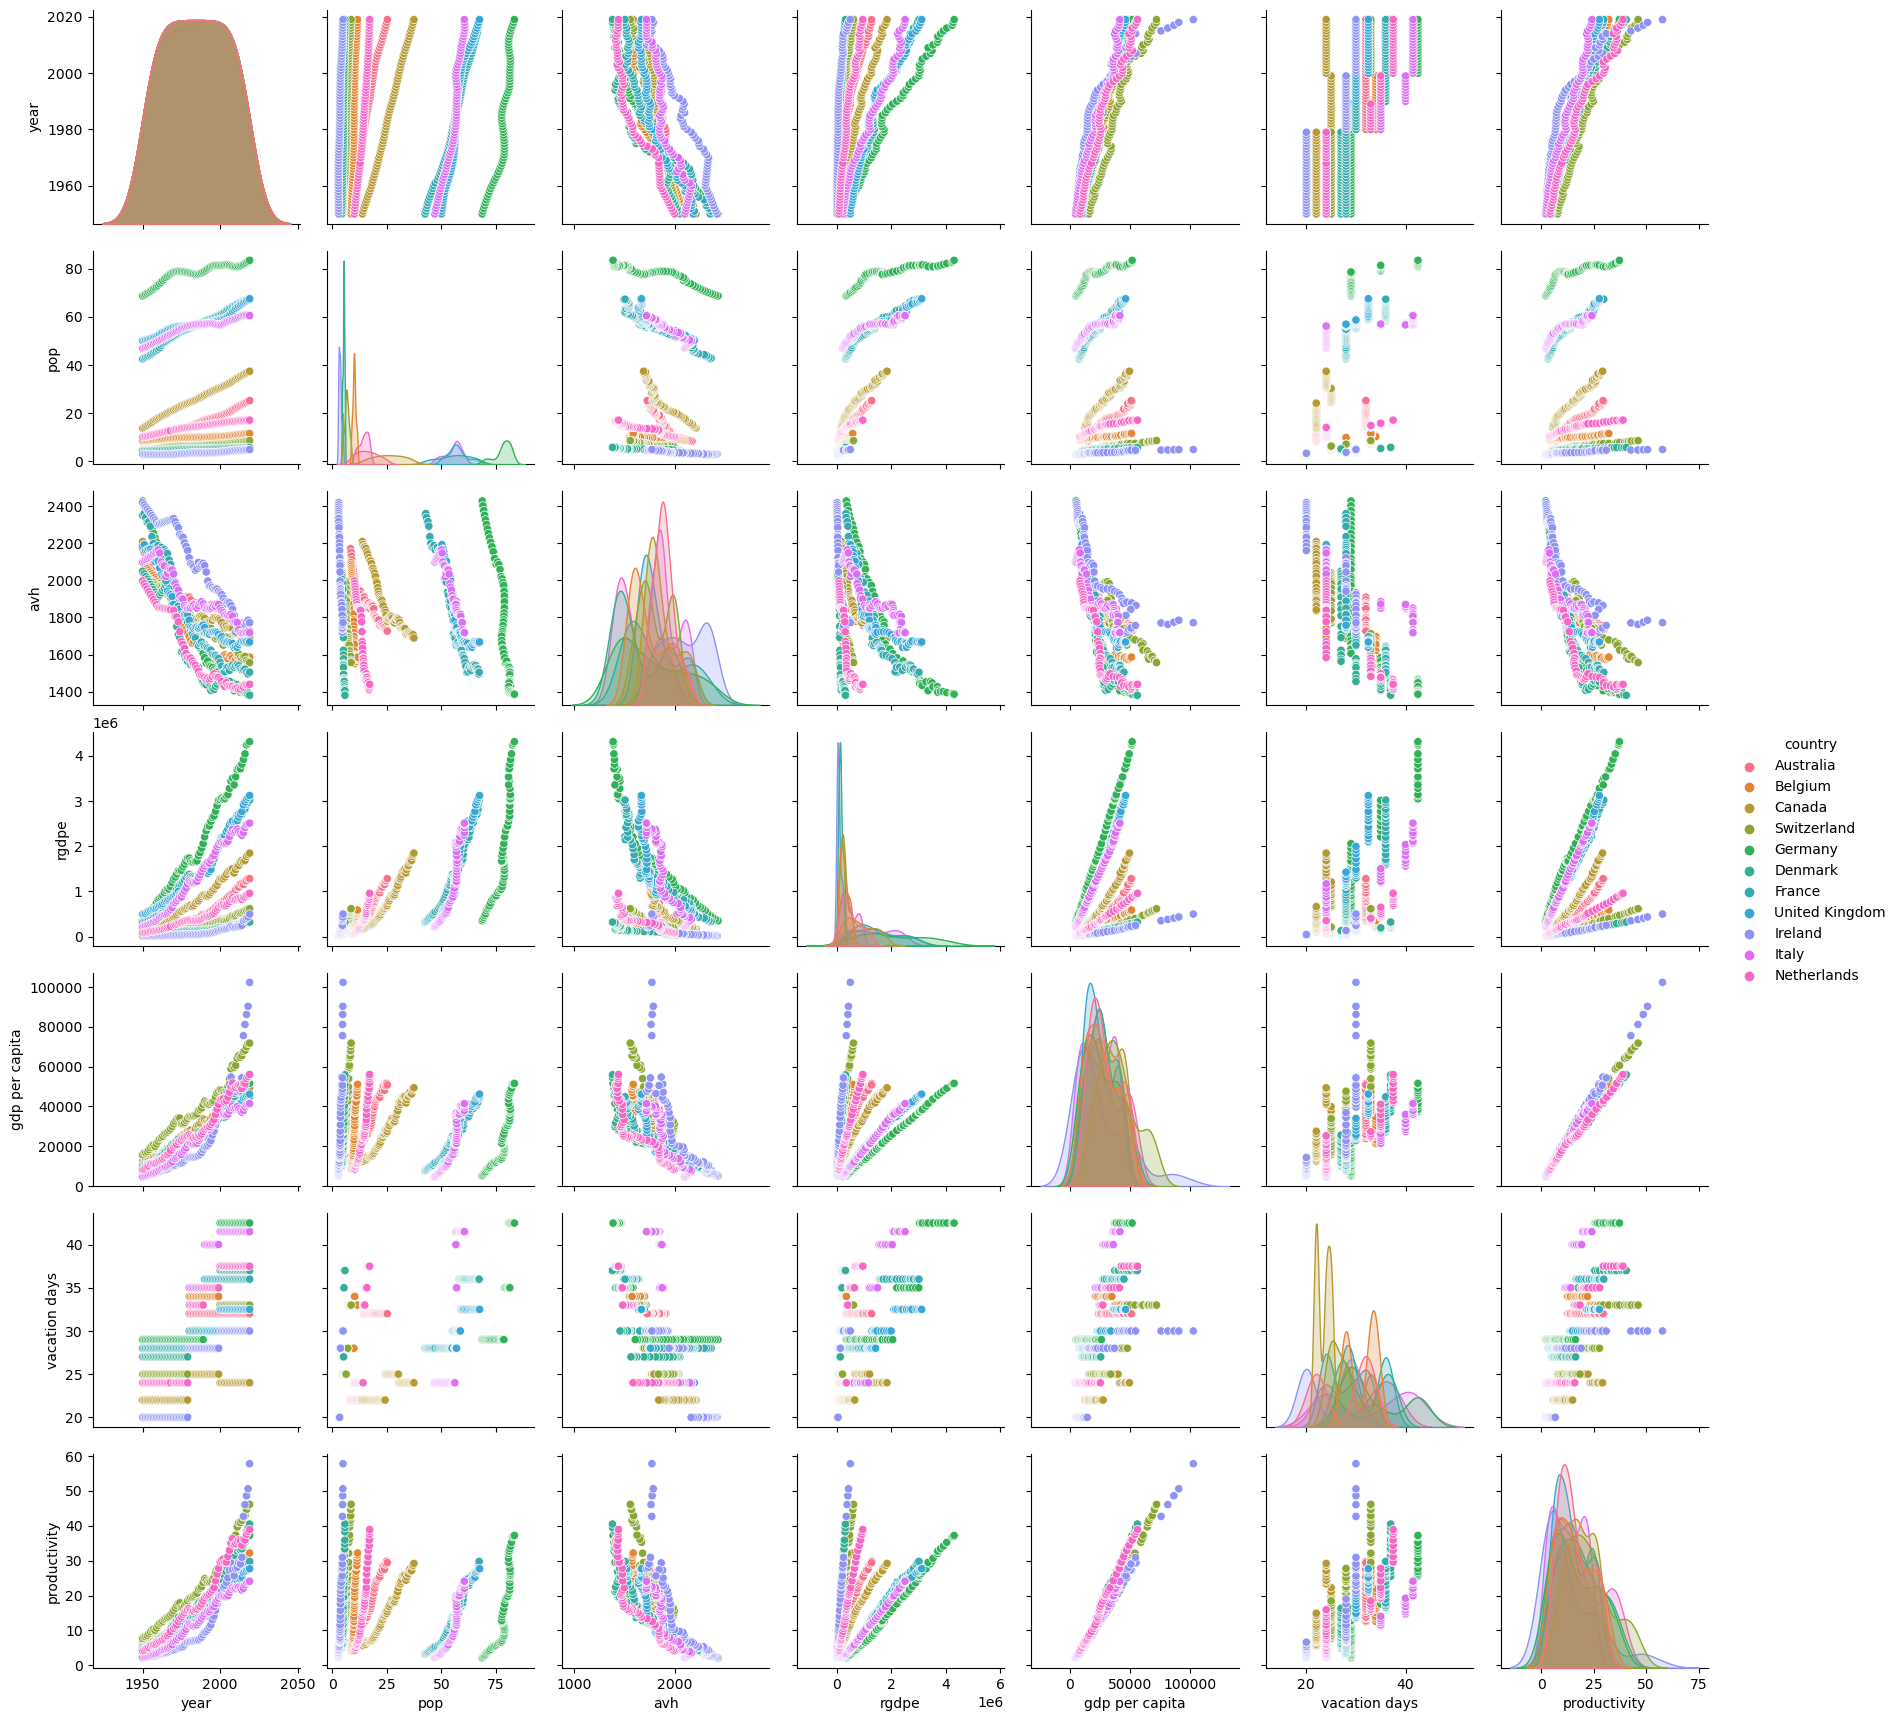

In [13]:
df_s = df.copy()   
df_s.drop(df_s[df_s['country'] == 'United States'].index, inplace = True)
sns.pairplot(df_s, hue='country')

<p> Some trends from this show that as population increases, productivity also tends to increases, but these are linked variables. As the years increase, productivity increases which is good to see. 
    Also as the year increases, average working hours steeply decreases, while rdgpe continues to climb.

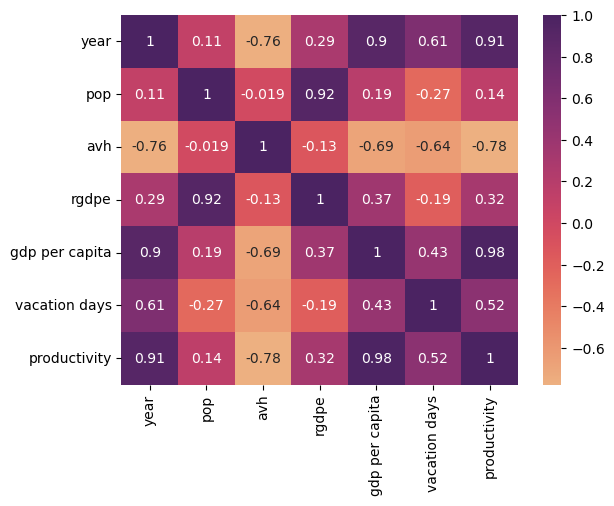

In [17]:
df_corr = df.corr()
ht = sns.heatmap(df_corr, annot = True, cmap = 'flare')

Interestingly from the heat map annual working hours is negatively correlated with productivity.

<AxesSubplot:xlabel='vacation days', ylabel='productivity'>

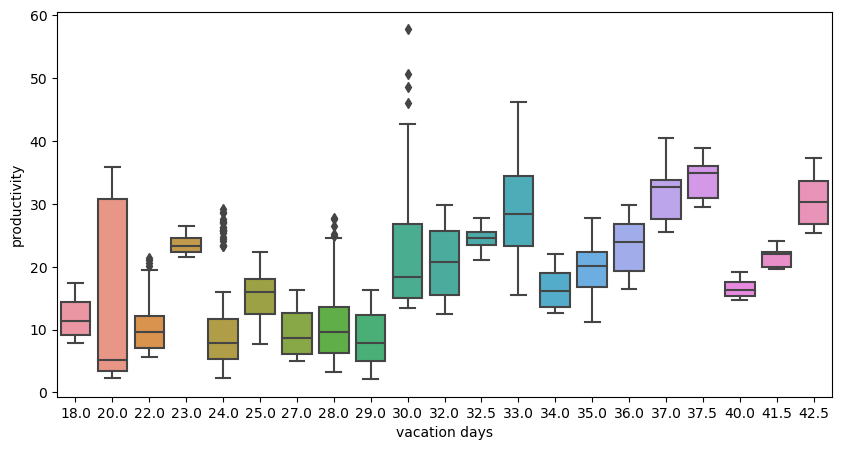

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x='vacation days', y='productivity', data = df)

It appears that between 30 and 42 vacation days per year is correlated with higher productivity, probably something worth investigating more.

---
# Task 2: Pipeline

Pretty much loaded, cleaned, and processed most of what I needed already at the start. I will make this process more neat in task 3 and optimizae it.

---
# Task 3: Method Chaining